# Predicting Customer Lifetime Value¶
Using past purchasing history of customers to build a model that can predict the CLV for new customers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics

In [2]:
raw_data = pd.read_csv("history.csv")
raw_data.head(2)

,CUST_ID,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,CLV
0,1001,150,75,200,100,175,75,13125
1,1002,25,50,150,200,175,200,9375


In [3]:
raw_data.dtypes

CUST_ID    int64
MONTH_1    int64
MONTH_2    int64
MONTH_3    int64
MONTH_4    int64
MONTH_5    int64
MONTH_6    int64
CLV        int64
dtype: object

# Correlation Analysis

In [4]:
cleaned_data = raw_data.drop("CUST_ID", axis=1)
cleaned_data.head(2)

,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,CLV
0,150,75,200,100,175,75,13125
1,25,50,150,200,175,200,9375


In [5]:
#correlation of all columns to CLV, Show 5 Highest correlations.
cleaned_data.corr()['CLV'].nlargest(5,)

CLV        1.000000
MONTH_1    0.734122
MONTH_5    0.376775
MONTH_3    0.371742
MONTH_6    0.327064
Name: CLV, dtype: float64

<AxesSubplot:>

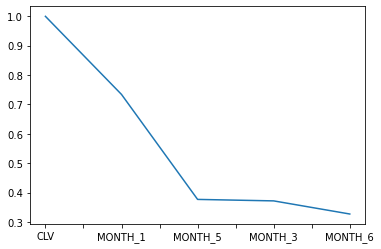

In [6]:
#Months are strongest correlation to the target variable (CLV).  Month 1 (73.4%), Month 5, Month 3, etc.
#Perfect correlation = 1, so strongest relationship is the highest value in month data. 
cleaned_data.corr()['CLV'].nlargest(5,).plot()

<AxesSubplot:>

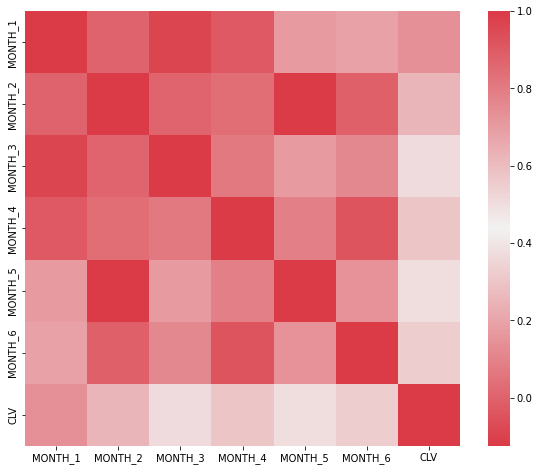

In [7]:
#corr = cleaned_data.corr()['CLV']
f,ax = plt.subplots(figsize=(10,8))
corr = cleaned_data.corr()
sn.heatmap(corr,mask=np.zeros_like(corr, dtype=bool), cmap=sn.diverging_palette(10,10,as_cmap=True), square=True, ax=ax)

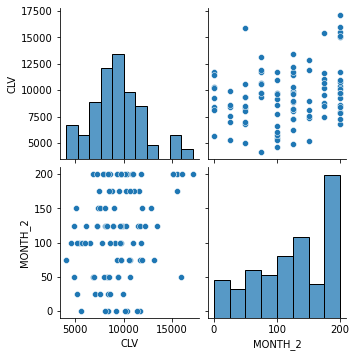

In [8]:
#corr = cleaned_data.corr()['CLV']
sn.pairplot(cleaned_data[['CLV', 'MONTH_2']])

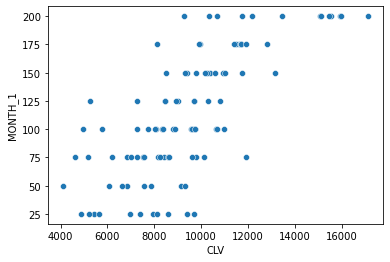

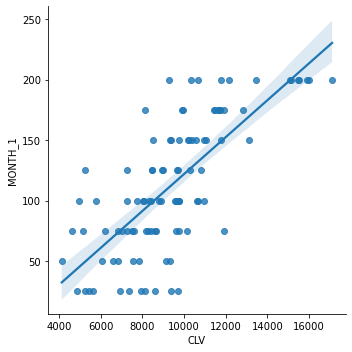

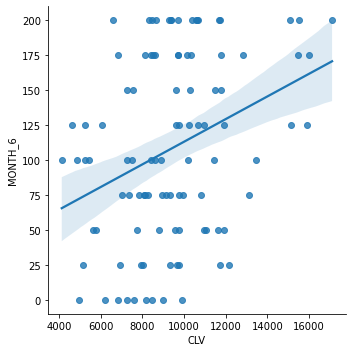

In [9]:
sn.scatterplot(data = cleaned_data, x = "CLV", y = "MONTH_1")
#plot the line of best fit for highest correlation month.
sn.lmplot(x="CLV", y="MONTH_1", data=cleaned_data);
#plot the line of Best fit for lowest correlation month.
sn.lmplot(x="CLV", y="MONTH_6", data=cleaned_data);

# Do Training & Testing Split
To perform supervised machine learning - need to split the data into training (80%) & testing (20%) datasets.

In [10]:
#Need to .Drop the Target column ('CLV') as a predictor.  
#Set Target as 'CLV' column. Training (.8) & testing (.2)

predictors = cleaned_data.drop("CLV", axis=1)
targets = cleaned_data.CLV
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.2)
print( "Predictor - Training: ", pred_train.shape, "Predictor - testing: ", pred_test.shape)

Predictor - Training:  (80, 6) Predictor - testing:  (20, 6)


# Build a Linear Regression equation for predicting CLV and 
then check its accuracy against the test dataset.

In [11]:
#Build model on training data
model = LinearRegression()
model.fit(pred_train, tar_train)
print("Coefficients: \n", model.coef_)
print("Intercept: ", model.intercept_)


#test on testing data
predictions = model.predict(pred_test)
predictions

sklearn.metrics.r2_score(tar_test, predictions)
#output shows the accuracy of the predicting CLV model is ?%.

Coefficients: 
 [35.18217264 11.16964325 15.60558107 11.91230637  8.19859712  5.52787568]
Intercept:  -273.8568136431404


0.9426854932320268


# Predicting for a new costumer

In [12]:
#Let's say new costumer spends = first 3 months 100€, 0€, 50€.
#Use this model to predict this customer's CLV

new_data = np.array([100,0,0,0,0,0]).reshape(1,-1)
new_pred=model.predict(new_data)
print("The CLV for the new costumer who bought only 100€ in first 3 months: €", new_pred[0].round(2))

The CLV for the new costumer who bought only 100€ in first 3 months: € 3244.36


C:\Users\Fer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
#Let's say new costumer spends = first 3 months 300€, 0€, 0€, 0€, 0€ .
#Use this model to predict this customer's CLV

second_data = np.array([100,0, 50,0,0,0]).reshape(1,-1)
second_pred=model.predict(second_data)
print("The CLV for the new costumer who bought only 300€ in first 3 months: €", second_pred[0].round(2))

The CLV for the new costumer who bought only 300€ in first 3 months: € 4024.64


C:\Users\Fer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
#A costumer spends 300€ in months 3 to 6 only. 

new_ = np.array([0,0, 300,300,300,300]).reshape(1,-1)
second_pred=model.predict(second_data)
print("The CLV for the new costumer who bought only 300€ in first 3 months: €", second_pred[0].round(2))

The CLV for the new costumer who bought only 300€ in first 3 months: € 4024.64


C:\Users\Fer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
